<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/J016_ML_Exp_13_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

!pip install livelossplot
from livelossplot import PlotLossesKeras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train_gray = x_train[:,:,:,0]
x_test_gray = x_test[:,:,:,0]

In [ ]:
print('Training Shape:', x_train_gray.shape)
print('Number of train samples:', x_train_gray.shape[0])
print('Number of test samples:', x_test_gray.shape[0])
x_val = x_test_gray[:7000]
x_test = x_test_gray[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))


Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000
Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


In [ ]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(64, activation = 'relu')(input_img)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [ ]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
print('Training Shape:', x_train_gray.shape)
print("Validation Shape: ",(x_val.shape, x_test.shape))
print('Testing Shape:', x_test.shape)

Training Shape: (50000, 32, 32)
Validation Shape:  ((7000, 32, 32), (3000, 32, 32))
Testing Shape: (3000, 32, 32)


In [ ]:
batch_size = 32
num_classes = 10
epochs = 10
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train_gray, x_train_gray, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [mc])

Epoch 1/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.5953
Epoch 00001: val_loss improved from inf to 0.58671, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5953 - val_loss: 0.5867
Epoch 2/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.5832
Epoch 00002: val_loss improved from 0.58671 to 0.57983, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5832 - val_loss: 0.5798
Epoch 3/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.5787
Epoch 00003: val_loss improved from 0.57983 to 0.57923, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5787 - val_loss: 0.5792
Epoch 4/10
1554/1563 [============================>.] - ETA: 0s - loss: 0.5771
Epoch 00004: val_loss improved from 0.57923 to 0.57589, saving model to AutoEncoder_C

In [ ]:
score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 4ms/step - loss: 0.5727
0.5727442502975464


In [ ]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.5014864206314087
Test Dataset Score: 0.49641433358192444


In [ ]:
def showImage(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

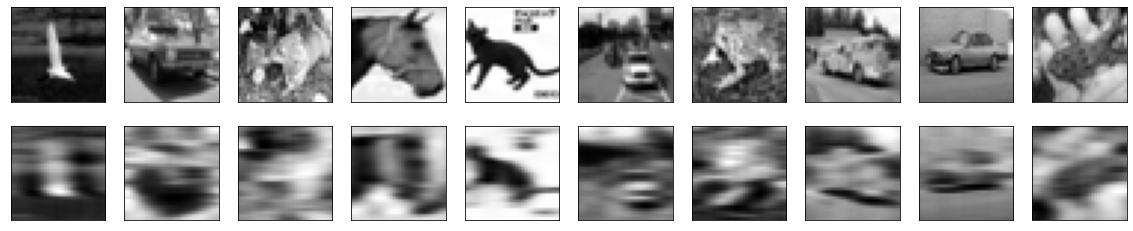

In [ ]:
showImage(x_test, c10test)